In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/network_tic_tac_toe.h5")

2021-12-05 11:08:51.742898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:08:51.772198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:08:51.772406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:08:51.772899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 1)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 256)    512         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 256)   1024        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 256)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(game.get_canonical_form(state))

2021-12-05 11:08:54.249604: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([4.2614393e-02, 1.0409183e-04, 1.5377425e-04, 1.7308076e-04,
        4.8491111e-05, 9.8427809e-05, 7.6168581e-05, 5.2364929e-05,
        9.5667917e-01], dtype=float32),
 0.25366828)

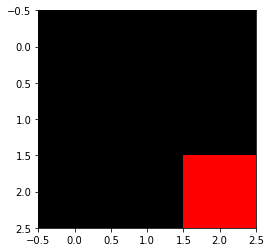

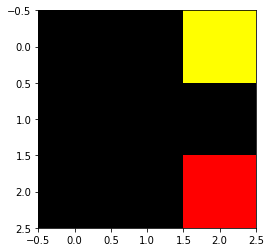

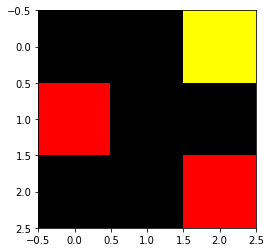

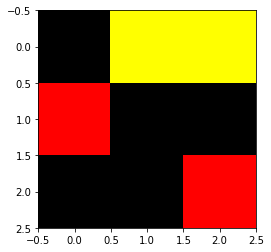

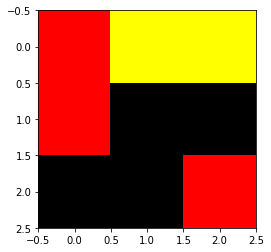

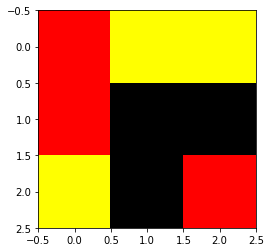

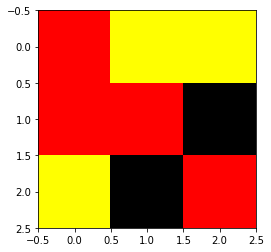

In [4]:
state = game.get_init_state()
game.play_vs_bot(model, Model(create_network(game.shape, game.nb_actions)), state, 50)

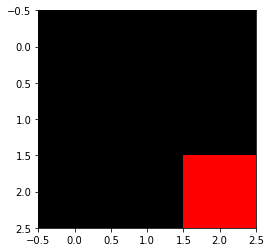

Model prediction: (array([4.2614393e-02, 1.0409183e-04, 1.5377425e-04, 1.7308076e-04,
       4.8491111e-05, 9.8427809e-05, 7.6168581e-05, 5.2364929e-05,
       9.5667917e-01], dtype=float32), 0.25366828)
Root value: 0.07522009670734406


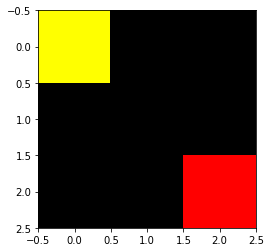

Model prediction: (array([8.26103911e-02, 8.08234140e-02, 1.17594704e-01, 1.61208570e-01,
       1.58618018e-01, 1.60135046e-01, 1.58430338e-01, 8.05771425e-02,
       2.38656366e-06], dtype=float32), -0.3297466)


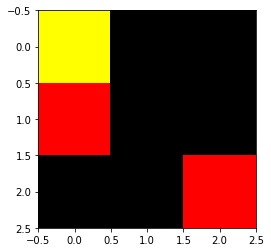

Model prediction: (array([2.4160545e-06, 4.3813255e-02, 4.0692247e-02, 8.3757019e-01,
       1.7149444e-04, 3.0736763e-02, 2.5071079e-04, 4.6762247e-02,
       6.1588855e-07], dtype=float32), -0.009085502)
Root value: -0.05909144984558225


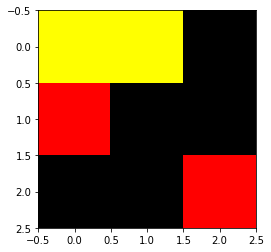

Model prediction: (array([3.0039959e-07, 8.2758173e-02, 7.1380630e-02, 2.5679304e-07,
       2.3927613e-01, 2.8476769e-01, 2.3956381e-01, 8.2252853e-02,
       1.3234049e-07], dtype=float32), 0.10190136)


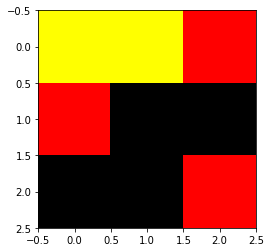

Model prediction: (array([1.5395057e-13, 2.9798566e-24, 9.9519265e-01, 1.3580656e-27,
       6.0526067e-10, 4.8074052e-03, 4.7332506e-11, 5.8734233e-16,
       2.8887647e-21], dtype=float32), 0.7889059)
Root value: -0.015778118371963502


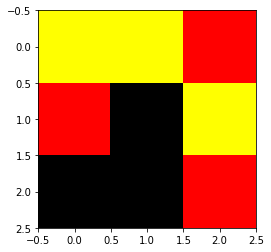

Model prediction: (array([4.2199796e-15, 1.5220257e-10, 4.3507058e-19, 1.3674288e-19,
       8.1854805e-06, 9.9999177e-01, 7.0024392e-10, 1.4516358e-16,
       1.3781152e-14], dtype=float32), -0.074905835)


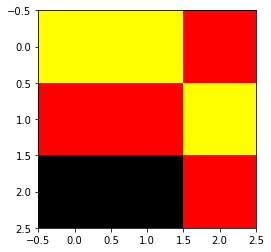

Model prediction: (array([1.0217753e-15, 1.4761658e-19, 1.0811712e-15, 2.4262138e-18,
       1.0000000e+00, 7.1695019e-17, 7.9917767e-11, 1.4738948e-16,
       6.1249591e-19], dtype=float32), -0.10343021)
Root value: 0.0


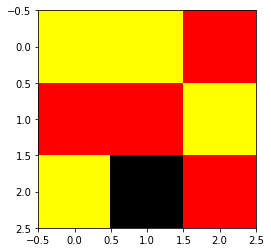

Model prediction: (array([1.0986220e-08, 1.5775045e-16, 1.1697791e-14, 7.2362372e-18,
       4.3190871e-13, 2.5325645e-13, 9.9773645e-01, 2.2635057e-03,
       5.1639411e-16], dtype=float32), 0.10360336)


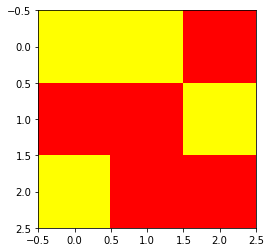

Model prediction: (array([2.2278915e-08, 5.5653806e-09, 2.0968639e-10, 1.8340630e-10,
       6.5846856e-11, 6.8193373e-10, 3.1803924e-09, 1.0000000e+00,
       8.2141205e-10], dtype=float32), -0.052407097)
Root value: 0.0


In [5]:
state = game.get_init_state()
#state = game.get_new_state(state, 4)
#state = game.get_new_state(state, 3)
game.play_vs(model, state, 50)